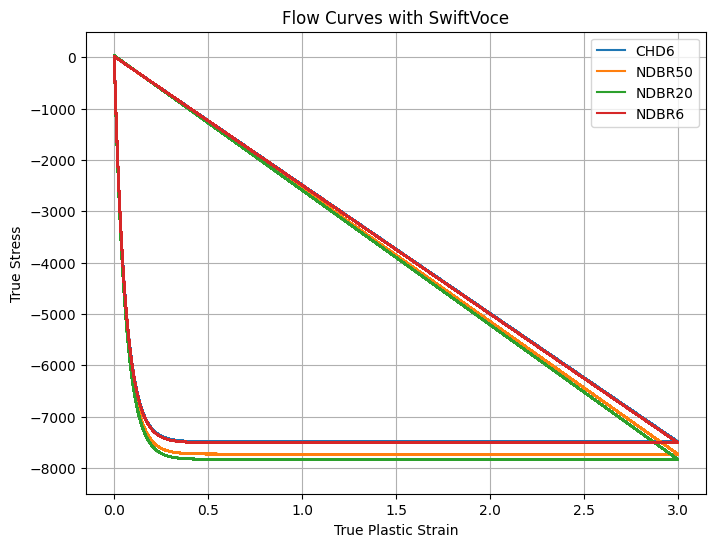

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the Swift-Voce hardening law
def Swift(c1, c2, c3, truePlasticStrain):
    trueStress = c1 * (c2 + truePlasticStrain) ** c3
    return trueStress

def Voce(c1, c2, c3, truePlasticStrain):
    trueStress = c1 + c2 * (1 - np.exp(-c3 * truePlasticStrain))
    return trueStress

def SwiftVoce(parameters, truePlasticStrain):
    c1, c2, c3, c4, c5, c6, c7 = parameters
    trueStressSwift = Swift(c1, c2, c3, truePlasticStrain)
    trueStressVoce = Voce(c4, c5, c6, truePlasticStrain)
    trueStress = c7 * trueStressSwift + (1 - c7) * trueStressVoce
    return trueStress

# Define the predicted parameters for each geometry
ndbr50_parameters = [0.34693920612335205, 81.60416412353516, -0.055532973259687424, -0.017645858228206635, 84.41319274902344, 16.9119930267334, 92.86833190917969]
ndbr20_parameters = [0.30565929412841797, 81.86551666259766, -0.007358472794294357, -0.07402362674474716, 85.24525451660156, 16.920074462890625, 93.257568359375]
ndbr6_parameters = [0.42417627573013306, 80.42292785644531, -0.07657758891582489, 0.09873834997415543, 83.21080017089844, 16.84128189086914, 91.41988372802734]
chd6_parameters = [0.42981618642807007, 80.33238220214844, -0.078600212931633, 0.10392174869775772, 83.11888885498047, 16.8377742767334, 91.31214141845703]

# Load true plastic strain data
chd6_truePlasticStrain = pd.read_csv('MODEL_DATA/StressStrain/chd6_strain_data_formatted.csv', header=None)
ndbr50_truePlasticStrain = pd.read_csv('MODEL_DATA/StressStrain/ndbr50_strain_data_formatted.csv', header=None)
ndbr20_truePlasticStrain = pd.read_csv('MODEL_DATA/StressStrain/ndbr20_strain_data_formatted.csv', header=None)
ndbr6_truePlasticStrain = pd.read_csv('MODEL_DATA/StressStrain/ndbr6_strain_data_formatted.csv', header=None)

chd6_strain_data = chd6_truePlasticStrain[0]
ndbr50_strain_data = ndbr50_truePlasticStrain[0]
ndbr20_strain_data = ndbr20_truePlasticStrain[0]
ndbr6_strain_data = ndbr6_truePlasticStrain[0]

# Calculate true stress using the predicted parameters
chd6_trueStress = SwiftVoce(chd6_parameters, chd6_strain_data)
ndbr50_trueStress = SwiftVoce(ndbr50_parameters, ndbr50_strain_data)
ndbr20_trueStress = SwiftVoce(ndbr20_parameters, ndbr20_strain_data)
ndbr6_trueStress = SwiftVoce(ndbr6_parameters, ndbr6_strain_data)

# Plot the flow curves
plt.figure(figsize=(8, 6))
plt.plot(chd6_strain_data, chd6_trueStress, label='CHD6')
plt.plot(ndbr50_strain_data, ndbr50_trueStress, label='NDBR50')
plt.plot(ndbr20_strain_data, ndbr20_trueStress, label='NDBR20')
plt.plot(ndbr6_strain_data, ndbr6_trueStress, label='NDBR6')
plt.xlabel('True Plastic Strain')
plt.ylabel('True Stress')
plt.legend()
plt.title('Flow Curves with SwiftVoce')
plt.grid(True)
plt.ylim(-8500, 500)
plt.show()


In [25]:
# Testing
print("CHD6 Strain Data:", chd6_strain_data)
print("CHD6 True Stress:", chd6_trueStress)

CHD6 Strain Data: 0         0.0000
1         0.0005
2         0.0010
3         0.0015
4         0.0020
           ...  
510195    2.9800
510196    2.9850
510197    2.9900
510198    2.9950
510199    3.0000
Name: 0, Length: 510200, dtype: float64
CHD6 True Stress: 0           18.417273
1          -44.515055
2         -106.919786
3         -168.801345
4         -230.164117
             ...     
510195   -7488.307056
510196   -7488.307187
510197   -7488.307318
510198   -7488.307448
510199   -7488.307579
Name: 0, Length: 510200, dtype: float64


In [26]:
print("NDBR50 Strain Data:", ndbr50_strain_data)
print("NDBR50 True Stress:", ndbr50_trueStress)

NDBR50 Strain Data: 0         0.0000
1         0.0005
2         0.0010
3         0.0015
4         0.0020
           ...  
510195    2.9800
510196    2.9850
510197    2.9900
510198    2.9950
510199    3.0000
Name: 0, Length: 510200, dtype: float64
NDBR50 True Stress: 0           26.853460
1          -38.445476
2         -103.194573
3         -167.398460
4         -231.061729
             ...     
510195   -7728.095956
510196   -7728.096039
510197   -7728.096121
510198   -7728.096204
510199   -7728.096287
Name: 0, Length: 510200, dtype: float64


In [27]:
print("CHD6 Strain Data:", ndbr20_strain_data)
print("CHD6 True Stress:", ndbr20_trueStress)

CHD6 Strain Data: 0         0.0000
1         0.0005
2         0.0010
3         0.0015
4         0.0020
           ...  
510195    2.9800
510196    2.9850
510197    2.9900
510198    2.9950
510199    3.0000
Name: 0, Length: 510200, dtype: float64
CHD6 True Stress: 0           34.425116
1          -31.828368
2          -97.523709
3         -162.665609
4         -227.258731
             ...     
510195   -7830.102039
510196   -7830.102051
510197   -7830.102063
510198   -7830.102075
510199   -7830.102087
Name: 0, Length: 510200, dtype: float64


In [28]:
print("NDBR50 Strain Data:", ndbr6_strain_data)
print("NDBR50 True Stress:", ndbr6_trueStress)

NDBR50 Strain Data: 0         0.0000
1         0.0005
2         0.0010
3         0.0015
4         0.0020
           ...  
510195    2.9800
510196    2.9850
510197    2.9900
510198    2.9950
510199    3.0000
Name: 0, Length: 510200, dtype: float64
NDBR50 True Stress: 0           18.784713
1          -44.305449
2         -106.866583
3         -168.903124
4         -230.419470
             ...     
510195   -7505.203269
510196   -7505.203395
510197   -7505.203522
510198   -7505.203649
510199   -7505.203776
Name: 0, Length: 510200, dtype: float64
